In [1]:
from bs4 import BeautifulSoup
import pymongo
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# IMBD Web Scrape
movie_titles = []

In [7]:
# web scrape code here 
start = 1

while start < 10000:
    imdb_url = f'https://www.imdb.com/search/title/?title_type=feature&release_date=2010-01-01,2019-12-31&view=simple&sort=num_votes,desc&start={start}&ref_=adv_nxt'
    imdb_response = requests.get(imdb_url)
    soup = BeautifulSoup(imdb_response.text, 'html')
    results = soup.find_all('div', class_='col-title')
    
    for result in results:
        title = result.find('a').text
        movie_titles.append(title)
    start += 50

In [8]:
# OMDB requests
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=trilogy"

In [16]:
# for loop to access movie titles, and reques OMDB information to dump into JSON output
import time

output = [] # list for our json objects from OMDB
count = 0
try:
    for movie in movie_titles: 
        response = requests.get(url + movie + api_key)
        data = response.json()
        output.append(data)
        count += 1
except:
    print(f'Total movies pulled: {count}')
        
with open('data.json', 'w') as outfile:
    json.dump(output, outfile)

Total movies pulled: 4578


In [21]:
output[0]['Metascore']

'74'

In [61]:
movie_titles = []

index = 0

for item in output:
    try:
        movie_titles.append(item['Title'])
        index += 1
    except KeyError:
        movie_titles.append("NA")
        index += 1

len(movie_titles)

4578

In [37]:
metascores = []

index = 0

for item in output:
    try:
        metascores.append(item['Metascore'])
        index += 1
    except KeyError:
        metascores.append("NA")
        index += 1

len(metascores)

4578

In [39]:
metascore_ints = []
error_count = 0

for metascore in metascores:
    try:
        metascore_int = int(metascore)
        metascore_ints.append(metascore_int)
    except ValueError:
        error_count += 1

print(f'Error count: {error_count}')
    
# metascore_ints

Error count: 1427


In [40]:
max_score = max(metascore_ints)
min_score = min(metascore_ints)

print(f'Max Score is: {max_score}')
print(f'Min Score is: {min_score}')

Max Score is: 100
Min Score is: 1


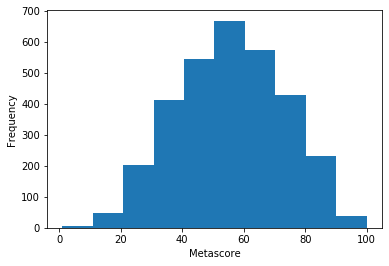

In [41]:
plt.hist(metascore_ints, bins = 10)
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.show()

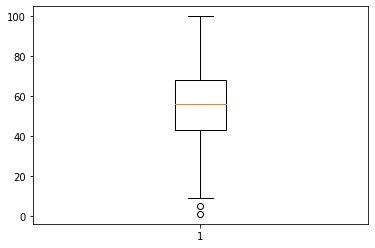

In [42]:
plt.boxplot(metascore_ints)
plt.show()

In [50]:
directors = []

index = 0

for item in output:
    try:
        directors.append(item['Director'])
        index += 1
    except KeyError:
        directors.append("NA")
        index += 1 

print(directors)

son Bateman', 'Joe Swanberg', 'Julian Gilbey', 'Evan Glodell', 'Nick Morris, Laurence Connor', 'Richard Tanne', 'Jonathan Mostow', 'Karthik Subbaraj', 'David O. Russell', 'Travis Milloy', 'Edgar Marie, Benoît Neveur', 'Laxman Utekar', 'Xavier Legrand', 'N/A', 'NA', 'Cem Yilmaz', 'Pablo Trapero', 'Pa. Ranjith', 'Charlie Stratton', 'Vivek Agnihotri', 'Timo Vuorensola', 'Paul Schrader', 'NA', 'Rob W. King', 'Sajid Khan', 'Scott Speer', 'Tyler Perry', 'NA', 'Tyler Perry', 'Craig Viveiros', 'Chi Lo', 'Richard Schenkman', 'Arnaud des Pallières', 'John Suits', 'Sophie Barthes', 'NA', 'Bharathan', 'Gurmeet Ram Rahim Singh', 'Michel Leclerc', 'Peter Jackson', 'François Ozon', 'Laurits Munch-Petersen', 'Ekachai Uekrongtham', 'Steven C. Miller', 'Tyler Perry', 'Jerzy Skolimowski', 'Jon Gunn', 'Stephanie Laing', 'Robin Bissell', 'Adam Alleca', 'Jeremy Sims', 'Vetrimaaran', 'NA', 'Julie Taymor', 'Léa Frédeval', 'Chao-Bin Su, John Woo(co-director)', 'Sam Jaeger', 'Hélène Giraud, Thomas Szabo', 'NA',

In [49]:
actors = []

index = 0

for item in output:
    try:
        actors.append(item['Actors'])
        index += 1
    except KeyError:
        actors.append("NA")
        index += 1

print(actors)

one, Tom Courtenay', 'Burçin Bildik, Alper Saldiran, Fulya Zenginer, Hüseyin Avni Danyal', 'Catherine Steadman, Richard Coyle, Ali Craig, Nick Nevern', 'NA', 'Haley Joel Osment, Lorenza Izzo, Kevin Balmore, Retta', 'Akshay Kumar, Bobby Deol, Sonam Kapoor, Sunil Shetty', 'John Travolta, Morgan Freeman, Brendan Fraser, Famke Janssen', 'N/A', 'Riaz Ahmed, Karrthik Ahuja, Bhai Amma, Rj Ananthi', 'Macha Méril, Richard Berry, Jacques Penot, Manuel Gélin', 'Jessica Chastain, Colin Farrell, Samantha Morton, Nora McMenamy', 'NA', 'Nicolas Cage, Leslie Bibb, Cole Hauser, Laurence Fishburne', 'Pekka Strang, Seumas F. Sargent, Chris Myland, Alf Myreen', 'Markees Christmas, Craig Robinson, Carla Juri, Patrick Güldenberg', 'NA', 'Nichole Bloom, Fabianne Therese, Pat Healy, Michelle Borth', 'Payman Maadi, Navid Mohammadzadeh, Parinaz Izadyar, Farhad Aslani', 'Ansel Elgort, Suki Waterhouse, Patricia Clarkson, Matt Bomer', 'Ramesh, J. Vignesh, Aishwarya Rajesh, Ramesh Thilak', 'Sandra Oh, Anne Heche, A

In [51]:
years = []

index = 0

for item in output:
    try:
        years.append(item['Year'])
        index += 1
    except KeyError:
        years.append("NA")
        index += 1

print(years)

', 'NA', '2016', '2013', 'NA', '2010', '2014', '2013', '2015', '2012', '2015', '2014', '2011', '2019', '2016', '2018', '2017', '1919', '2010–2015', '2011', '2019', '2017', '2010', '2015', '2018', '2019', '2011', 'NA', '2017', '2011', '2014', '2016', 'NA', '2020–', '2018', '2012', '2013', '2012', '2012', '2015', '2017', '2015', '2013', '2014', '2010', '2016', '2011', '2015', '2013', '2013', '2014', '2012', '2011', '2018', '2012', '2010', '2016', '2011', '2017', '2012', '2013', '2013', '2014', '2019', '2013', '2017', '2013', '2019', 'NA', '2019', '2018', '2017', '2011', '2010', '2016', '2019', '2017', 'NA', '1999', '2017', '2018', '2015', '2012', '2003–2004', '2011', '2014', '2016', '2016', '2019', '1932', '2018', '2012', '2014', '2011', '2011', '2015', '2012', '2014', '2015', '2015', '2019', '2012', '2014', '2017', '2013', '2012', '2017', '2015', '2014', '2015', '2014', '2019', '2019', '2014', '2015', '2016', '2018', '2017', '2019', '2018', '2014', 'NA', '2013', '2012', '2018', '2017', 

In [52]:
boxOffices = []

index = 0

for item in output:
    try:
        boxOffices.append(item['BoxOffice'])
        index += 1
    except KeyError:
        boxOffices.append("NA")
        index += 1

print(boxOffices)

/A', 'N/A', 'N/A', '$242,008', '$198,116,802', '$22,838,662', '$4,895,965', 'N/A', 'N/A', '$5,895,238', 'N/A', '$10,230', '$64,727', '$100,169,068', 'N/A', 'N/A', 'N/A', 'NA', 'N/A', 'N/A', 'N/A', '$122,892', '$551,609', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$16,291', 'N/A', 'N/A', '$233,569', 'N/A', 'N/A', 'N/A', 'N/A', 'NA', 'N/A', '$54,371', 'NA', '$14,637,490', 'N/A', 'N/A', 'N/A', '$477', '$129,747', '$13,710,572', '$9,500,000', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'NA', 'N/A', 'N/A', 'N/A', '$947', 'N/A', 'N/A', 'N/A', '$1,043,531', 'NA', 'N/A', 'N/A', 'N/A', 'N/A', 'NA', 'NA', 'N/A', '$3,500', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$2,662,550', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$2,155,334', 'N/A', '$4,700,000', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$28,785', '$1,049,915', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'NA', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$4,060,197', 'N/A', '$1,623,366', 'NA', 'N/A', 'N/A', 'N/A', '$14,443,077', '

In [53]:
ratings = []

index = 0

for item in output:
    try:
        ratings.append(item['Rated'])
        index += 1
    except KeyError:
        ratings.append("NA")
        index += 1

print(ratings)

, 'R', 'R', 'R', 'R', 'R', 'Not Rated', 'PG', 'R', 'PG-13', 'R', 'R', 'PG-13', 'Not Rated', 'PG', 'R', 'R', 'Unrated', 'R', 'R', 'Not Rated', 'Not Rated', 'R', 'PG-13', 'N/A', 'R', 'R', 'Not Rated', 'N/A', 'R', 'Not Rated', 'R', 'PG-13', 'TV-PG', 'TV-MA', 'Not Rated', 'R', 'N/A', 'NA', 'R', 'Not Rated', 'PG-13', 'TV-MA', 'PG', 'R', 'R', 'R', 'N/A', 'Not Rated', 'NA', 'R', 'R', 'PG-13', 'Not Rated', 'R', 'PG-13', 'PG-13', 'Not Rated', 'R', 'R', 'PG', 'Not Rated', 'N/A', 'Not Rated', 'N/A', 'TV-MA', 'R', 'Not Rated', 'NA', 'R', 'PG', 'Not Rated', 'Not Rated', 'PG-13', 'TV-14', 'Not Rated', 'R', 'Not Rated', 'R', 'R', 'Not Rated', 'Not Rated', 'PG-13', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'PG-13', 'Not Rated', 'R', 'Not Rated', 'PG-13', 'N/A', 'PG-13', 'PG-13', 'Not Rated', 'PG-13', 'R', 'TV-14', 'N/A', 'R', 'Not Rated', 'R', 'PG-13', 'N/A', 'Not Rated', 'PG-13', 'R', 'G', 'R', 'N/A', 'R', 'R', 'Not Rated', 'PG-13', 'R', 'N/A', 'R', 'Not Rated', 'Not Rated', 'R', 'R', 'Not Rated', 'Not Rated

In [54]:
imdbRatings = []

index = 0

for item in output:
    try:
        imdbRatings.append(item['imdbRating'])
        index += 1
    except KeyError:
        imdbRatings.append("NA")
        index += 1

print(imdbRatings)

7', 'NA', '6.5', '6.6', '5.4', '5.5', '7.3', '6.9', '5.4', '6.3', '6.4', '5.5', '6.5', '6.0', '7.1', '7.6', '7.1', '6.3', '7.3', '7.5', '7.6', '6.2', '6.5', '6.9', '7.3', '1.4', '6.0', '6.8', '6.2', '7.6', '8.2', '6.1', '5.2', '7.6', '7.2', '5.1', '6.5', '7.1', '6.2', '5.9', '8.1', '6.5', '6.7', '6.2', '7.1', '5.7', '6.4', '4.8', '7.4', '6.4', '7.4', '7.1', '7.5', '6.1', '7.3', '5.7', '6.9', '5.4', '6.1', '5.5', '5.8', '6.5', '6.3', '3.8', '7.0', '6.4', '4.8', '7.1', '7.6', '6.9', '5.7', '4.8', '5.3', '7.2', '6.6', '7.4', '7.3', '7.4', '6.4', 'NA', '7.0', '6.4', '7.3', '6.7', '6.4', '6.5', '7.8', '7.1', '6.7', '6.0', '6.7', '6.2', '6.9', '5.8', '7.5', '6.7', '7.6', '7.6', '7.2', '6.2', '7.7', '5.2', '6.3', '8.0', 'NA', '6.5', '4.4', '6.7', '6.8', '6.1', '6.0', '5.8', '6.9', '7.6', '5.6', '4.9', '7.2', '5.6', '7.1', '5.8', '6.0', '5.4', '6.7', '5.3', '8.3', '6.0', '7.0', '5.8', '8.1', '6.3', '6.8', '7.1', '7.2', '3.2', '4.0', '5.9', '4.3', '7.1', '6.2', '4.6', '5.7', '6.8', '5.8', '6.0'

In [55]:
imdbVotes = []

index = 0

for item in output:
    try:
        imdbVotes.append(item['imdbVotes'])
        index += 1
    except KeyError:
        imdbVotes.append("NA")
        index += 1

print(imdbVotes)

283', '15,234', '15,329', '15,315', 'NA', '15,271', '15,127', '15,329', '15,221', '29,633', '15,245', 'NA', '15,180', '15,072', '14,981', '14,575', '14,399', '15,104', '15,018', '15,105', '14,872', '15,016', '15,004', '14,973', '106,935', '14,821', '14,951', '14,939', '14,963', '14,612', '14,924', '14,842', '14,858', '13,498', '14,854', '14,778', '14,753', '14,338', '14,817', '14,707', '14,622', 'NA', '14,767', '14,722', '14,703', '14,367', '14,708', '14,732', '14,648', '14,669', '14,446', '14,653', '14,503', '13,159', '14,263', '14,651', '14,373', '14,512', '14,525', '14,460', '14,621', '14,534', '14,403', '14,376', '14,586', '14,536', '14,569', '14,320', '13,936', '14,530', '14,439', '14,497', '14,374', '14,116', '14,416', '14,453', '14,441', '13,908', '14,454', '14,372', '14,335', '13,652', 'N/A', '14,393', '14,406', '13,813', '14,189', '14,265', '14,201', '14,280', '14,280', '14,240', '14,194', '13,924', '14,263', '14,112', '14,083', '14,257', '14,267', '57,437', '14,252', '14,010'

In [56]:
imdbIDs = []

index = 0

for item in output:
    try:
        imdbIDs.append(item['imdbID'])
        index += 1
    except KeyError:
        imdbIDs.append("NA")
        index += 1

print(imdbIDs)

 'tt6866224', 'NA', 'tt1718924', 'tt3992944', 'tt1407049', 'tt3541262', 'tt6040662', 'tt9248940', 'tt1843287', 'NA', 'tt5867800', 'tt4419364', 'tt3170902', 'tt1345777', 'tt5179598', 'tt5016946', 'tt5979872', 'tt1646926', 'tt3339674', 'tt10431500', 'NA', 'tt7957694', 'tt1640484', 'tt1781058', 'tt2061712', 'tt1838571', 'tt8510488', 'tt2935564', 'tt3001638', 'tt2954474', 'tt6062774', 'NA', 'tt2180994', 'tt0117443', 'tt1945062', 'tt1837636', 'NA', 'tt3859304', 'tt2952602', 'NA', 'tt6857112', 'tt3862750', 'tt3569782', 'tt2296777', 'tt1815708', 'tt1725795', 'tt6692354', 'tt3896738', 'tt3771536', 'tt2678948', 'tt2182256', 'tt8936646', 'tt6367558', 'tt9144098', 'tt2072227', 'tt8134742', 'tt1274586', 'tt6588966', 'tt8041276', 'tt5884234', 'tt1769363', 'tt1590950', 'tt2312890', 'tt9420648', 'tt2436682', 'tt1867093', 'tt6277440', 'tt4771896', 'tt1298554', 'tt5073620', 'tt1687281', 'tt2386237', 'tt2911668', 'tt5628302', 'tt1329457', 'tt1913166', 'tt0780548', 'tt1855401', 'tt0280380', 'tt1504403', 

# Lists
* imdbIDs
* movie_titles
* metascores
* metascore_ints
* directors
* actors
* years
* boxOffices
* ratings
* imdbRatings
* imdbVotes
* imdbIDs

In [62]:
len(movie_titles)

4578

In [64]:
df = pd.DataFrame(
    {'IMDB ID': imdbIDs,
     'Title': movie_titles,
     'Director': directors,
     'Actor': actors,
     'Year': years,
     'Box Office': boxOffices,
     'Rating': ratings,
     'IMDB Rating': imdbRatings,
     'IMDB Votes': imdbVotes,
     'Metascore': metascores
    })

df

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,"$292,568,851",PG-13,8.8,"1,953,512",74
1,tt1345836,The Dark Knight Rises,Christopher Nolan,"Christian Bale, Gary Oldman, Tom Hardy, Joseph...",2012,"$448,130,642",PG-13,8.4,"1,454,342",78
2,tt0816692,Interstellar,Christopher Nolan,"Ellen Burstyn, Matthew McConaughey, Mackenzie ...",2014,"$158,737,441",PG-13,8.6,"1,413,039",74
3,tt1853728,Django Unchained,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012,"$162,804,648",R,8.4,"1,282,957",81
4,tt0848228,The Avengers,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2012,"$623,279,547",PG-13,8.0,"1,225,316",69
...,...,...,...,...,...,...,...,...,...,...
4573,tt1733105,Bekas,Karzan Kader,"Zamand Taha, Sarwar Fazil, Diya Mariwan, Sulim...",2012,N/A,N/A,7.5,"3,936",N/A
4574,tt1672845,Tonight You're Mine,David Mackenzie,"Rebecca Benson, Luke Treadaway, Mathew Baynton...",2011,"$5,086",R,6.7,"4,223",41
4575,tt3567666,Stratton,Simon West,"Dominic Cooper, Austin Stowell, Gemma Chan, Co...",2017,N/A,R,4.8,"4,233",26
4576,tt7816392,The Bouncer,Julien Leclercq,"Jean-Claude Van Damme, Sami Bouajila, Sveva Al...",2018,N/A,R,5.9,"4,208",N/A


In [65]:
df['Actor'] = df['Actor'].str.rsplit(',').str[0]
df['Director'] = df['Director'].str.rsplit(',').str[0]

df

,IMDB ID,Title,Director,Actor,Year,Box Office,Rating,IMDB Rating,IMDB Votes,Metascore
0,tt1375666,Inception,Christopher Nolan,Leonardo DiCaprio,2010,"$292,568,851",PG-13,8.8,"1,953,512",74
1,tt1345836,The Dark Knight Rises,Christopher Nolan,Christian Bale,2012,"$448,130,642",PG-13,8.4,"1,454,342",78
2,tt0816692,Interstellar,Christopher Nolan,Ellen Burstyn,2014,"$158,737,441",PG-13,8.6,"1,413,039",74
3,tt1853728,Django Unchained,Quentin Tarantino,Jamie Foxx,2012,"$162,804,648",R,8.4,"1,282,957",81
4,tt0848228,The Avengers,Joss Whedon,Robert Downey Jr.,2012,"$623,279,547",PG-13,8.0,"1,225,316",69
...,...,...,...,...,...,...,...,...,...,...
4573,tt1733105,Bekas,Karzan Kader,Zamand Taha,2012,N/A,N/A,7.5,"3,936",N/A
4574,tt1672845,Tonight You're Mine,David Mackenzie,Rebecca Benson,2011,"$5,086",R,6.7,"4,223",41
4575,tt3567666,Stratton,Simon West,Dominic Cooper,2017,N/A,R,4.8,"4,233",26
4576,tt7816392,The Bouncer,Julien Leclercq,Jean-Claude Van Damme,2018,N/A,R,5.9,"4,208",N/A


In [66]:
df.to_csv('data.csv')